In [18]:
!pip install opencv-python
!pip install numpy
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import timeit

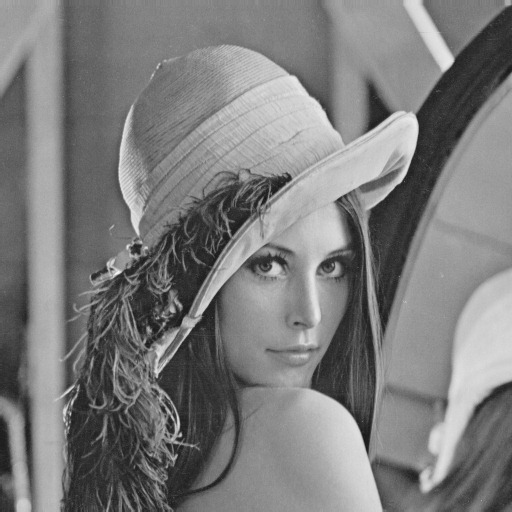

In [2]:
img_directory = "/content/lena.jpg"
lena_photo = cv2.imread(img_directory, cv2.IMREAD_GRAYSCALE)
cv2_imshow(lena_photo)

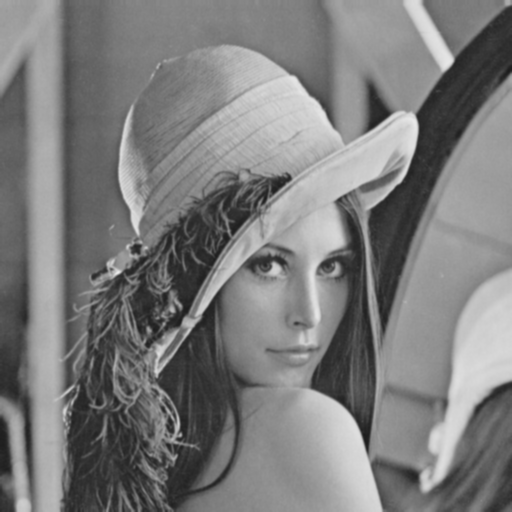

In [3]:
lena_blurred = cv2.GaussianBlur(lena_photo, (3, 3), 0, 0)
cv2_imshow(lena_blurred)


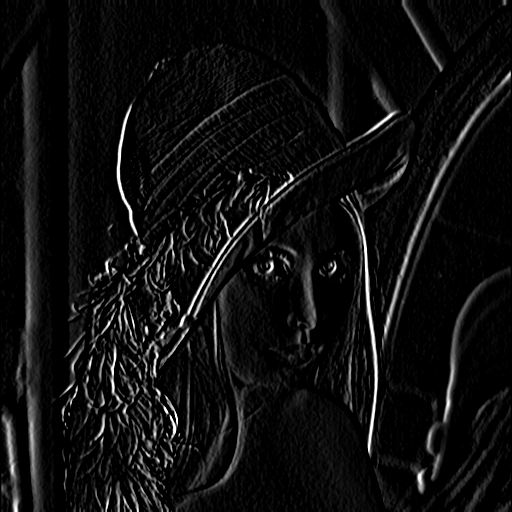

In [4]:
lena_sobel = cv2.Sobel(lena_blurred, cv2.CV_8U, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
cv2_imshow(lena_sobel)

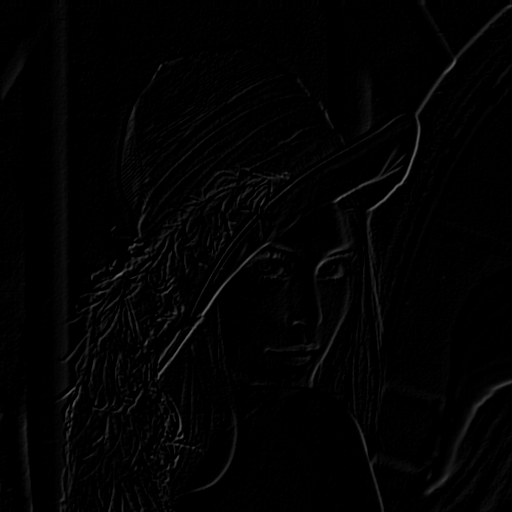

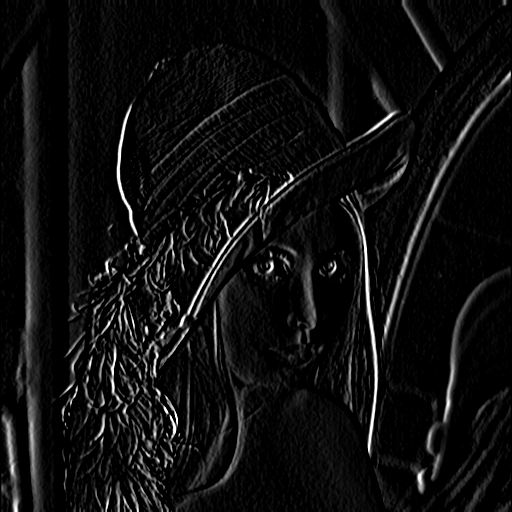

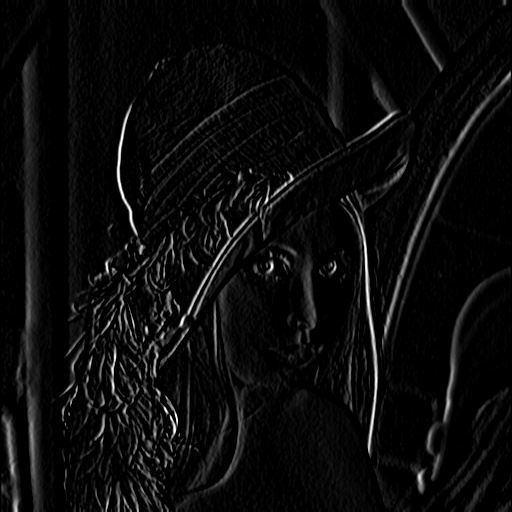

In [5]:
#ispod su izvedbe bez koristenja cv2.filter2D
#robertsov križni operator jednostavna izvedba
kernelx_roberts = np.array([[1,0],[0,-1]])
kernely_roberts = np.array([[0,-1],[1,0]])
robertsx = cv2.filter2D(lena_blurred, -1, kernelx_roberts)
robertsy = cv2.filter2D(lena_blurred, -1, kernelx_roberts)
cv2_imshow(robertsx)

#sobelov kompasni rubni operator jednostavna izvedba
kernelx_sobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernely_sobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobelx = cv2.filter2D(lena_blurred, -1, kernelx_sobel)
sobely = cv2.filter2D(lena_blurred, -1, kernely_sobel)
cv2_imshow(sobelx)

#perwittov kompasni rubni operator jednostavna izvedba
kernelx_perwitt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernely_perwitt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
perwittx = cv2.filter2D(lena_blurred, -1, kernelx_perwitt)
perwitty = cv2.filter2D(lena_blurred, -1, kernely_perwitt)
cv2_imshow(perwittx)

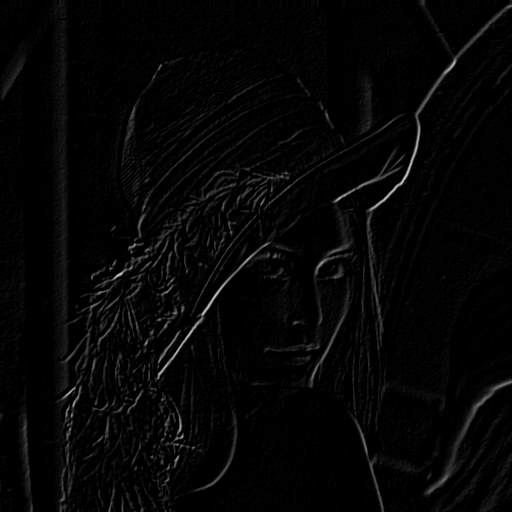

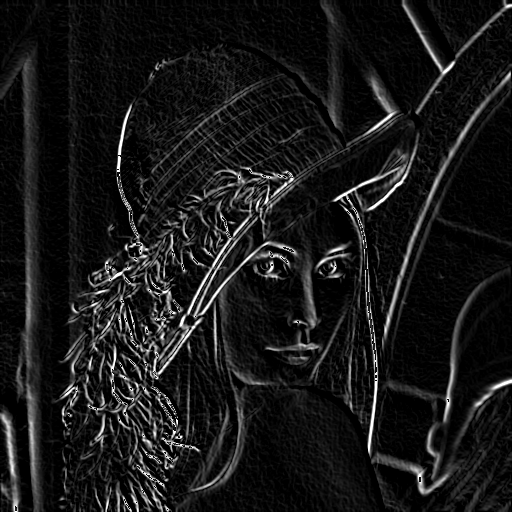

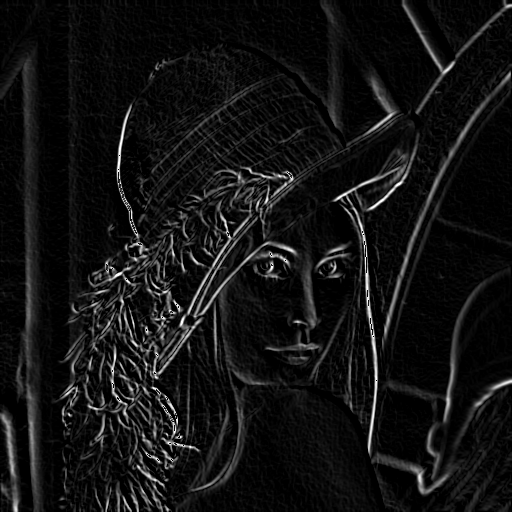

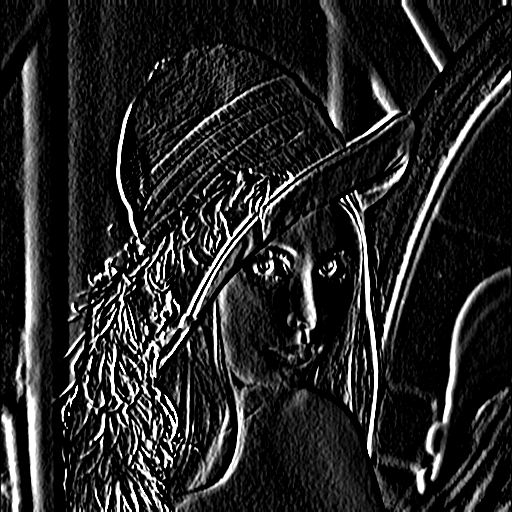

In [7]:
#kirschov kompasni rubni operator
N = np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
NW = np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]])
W = np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
SW = np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])
S = np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
SE = np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
E = np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])
NE = np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])
N_res = cv2.filter2D(lena_blurred, -1, N)
NW_res = cv2.filter2D(lena_blurred, -1, NW)
W_res = cv2.filter2D(lena_blurred, -1, W)
SW_res = cv2.filter2D(lena_blurred, -1, SW)
S_res = cv2.filter2D(lena_blurred, -1, S)
SE_res = cv2.filter2D(lena_blurred, -1, SE)
E_res = cv2.filter2D(lena_blurred, -1, E)
NE_res = cv2.filter2D(lena_blurred, -1, NE)
cv2_imshow(N_res)


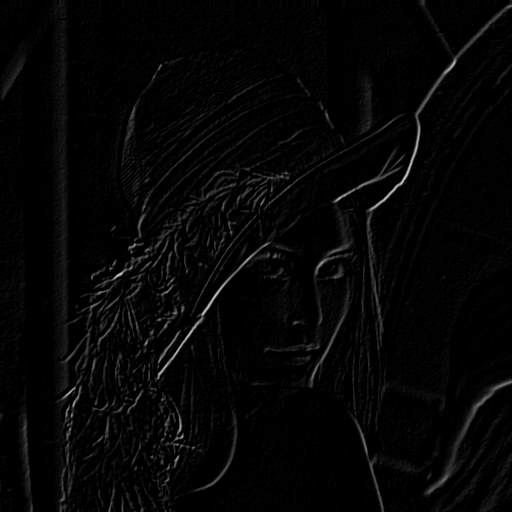

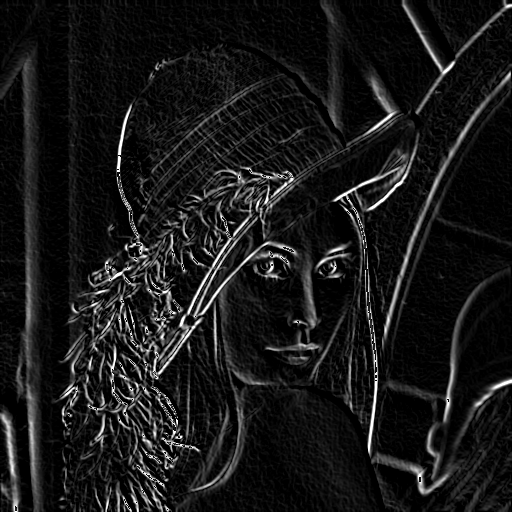

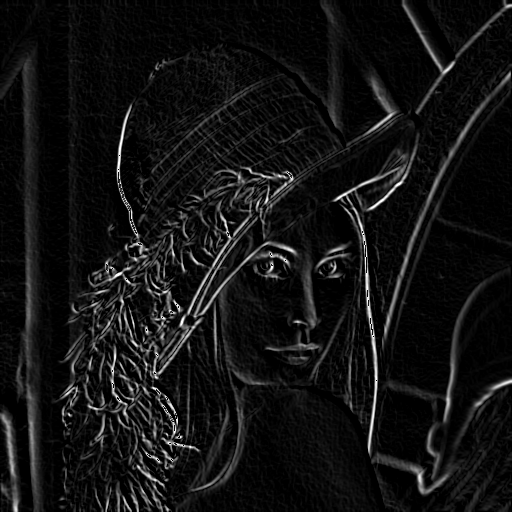

In [17]:
#robertsov operator zbrojen po x-u i y-u
roberts = robertsx + robertsy
cv2_imshow(roberts)

#sobelov operator zbrojen po x-u i y-u
sobel = sobelx + sobely
cv2_imshow(sobel)

#perwittov operator zbrojen po x-u i y-u
perwitt = perwittx + perwitty
cv2_imshow(perwitt)

#kirschov operator zbrojen po x-u i y-u
kirsch = N_res + NW_res + W_res + SW_res + S_res + SE_res + E_res + NE_res

1.9320436409998365


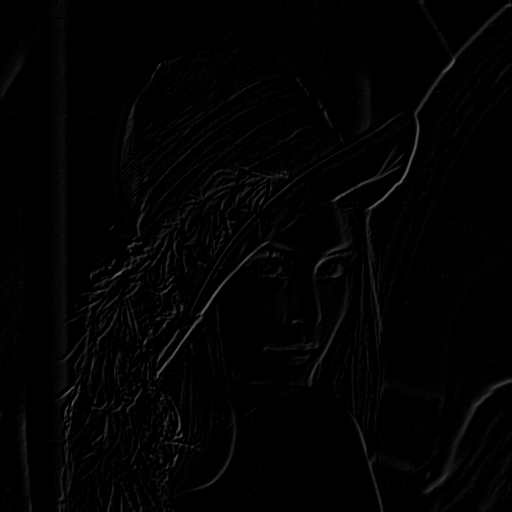

1.8930870129988762


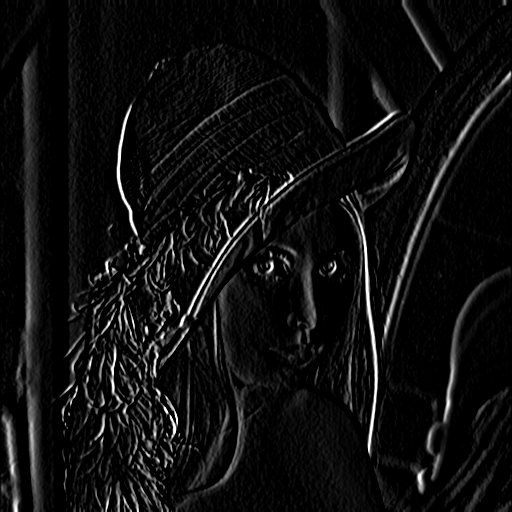

1.8789171579992399


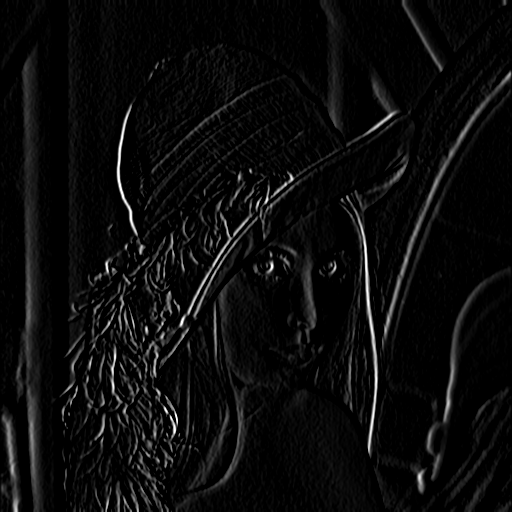

1.9184611059990857


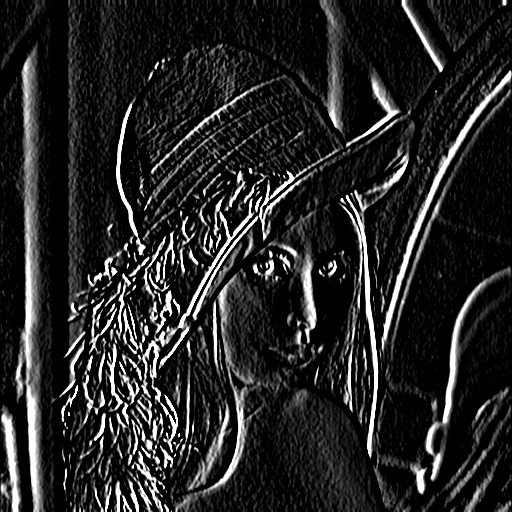

In [24]:
result = np.zeros((lena_photo.shape[0], lena_photo.shape[1]))
lena_blurred_padded = cv2.copyMakeBorder(lena_blurred, top=1, bottom=1, left=1, right=1, borderType=cv2.BORDER_REFLECT)

#roberts operator po x-u
start = timeit.default_timer()
for i in range(0, lena_blurred_padded.shape[0] - 2):
  for j in range(0, lena_blurred_padded.shape[1] - 2):
    result[i, j] = np.sum(np.multiply(lena_blurred_padded[(i + 1):(i + 3), (j + 1):(j + 3)], kernelx_roberts))
end = timeit.default_timer()
print(end - start)
cv2_imshow(result)

#sobelov operator po x-u
start = timeit.default_timer()
for i in range(0, lena_blurred_padded.shape[0] - 2):
  for j in range(0, lena_blurred_padded.shape[1] - 2):
    result[i, j] = np.sum(np.multiply(lena_blurred_padded[i:(i + 3), j:(j + 3)], kernelx_sobel))
end = timeit.default_timer()
print(end - start)
cv2_imshow(result)

#perwittov operator po x-u
start = timeit.default_timer()
for i in range(0, lena_blurred_padded.shape[0] - 2):
  for j in range(0, lena_blurred_padded.shape[1] - 2):
    result[i, j] = np.sum(np.multiply(lena_blurred_padded[i:(i + 3), j:(j + 3)], kernelx_perwitt))
end = timeit.default_timer()
print(end - start)
cv2_imshow(result)

#kirschov operator za N smjer
start = timeit.default_timer()
for i in range(0, lena_blurred_padded.shape[0] - 2):
  for j in range(0, lena_blurred_padded.shape[1] - 2):
    result[i, j] = np.sum(np.multiply(lena_blurred_padded[i:(i + 3), j:(j + 3)], N))
end = timeit.default_timer()
print(end - start)
cv2_imshow(result)
